# Accuracy Testing of KNN Algorithm

👨‍💻 **Arjun Adhikari**, June 15, 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('csv/train.csv')
print(data.shape)

(42000, 785)


In [3]:
print(data.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
data.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x = data.values
print(x.shape)

X = x[:, 1:]
Y = x[:, 0]

print(X.shape, Y.shape)

(42000, 785)
(42000, 784) (42000,)


In [6]:
def drawImg(sample):
    
    img = sample.reshape((28,28))
    plt.imshow(img)
    plt.show()

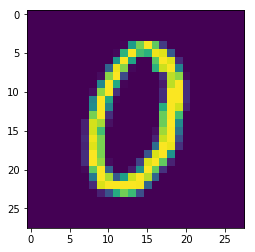

0


In [7]:
drawImg(X[5])
print(Y[5])

#### Splitting Training and Testing Data

In [8]:
split = int(0.999 * X.shape[0])

X_train = X[:split]
X_test = X[split:]

Y_train = Y[:split]
Y_test = Y[split:]

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(41958, 784) (41958,)
(42, 784) (42,)


### KNN Algorithm

In [9]:
def dist(X, Y):
    
    return np.sqrt(np.sum((X-Y)**2))

In [10]:
def knn(X, Y, queryPoint, k=5):
    
    m = X.shape[0]
    vals = []
    
    for i in range(m):
        
        d = dist(queryPoint, X[i])
        vals.append((d, Y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    
    new_vals = np.unique(vals[:,1], return_counts=True)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [11]:
knn(X_train, Y_train, X_test[0])
print(Y_test[0])

2


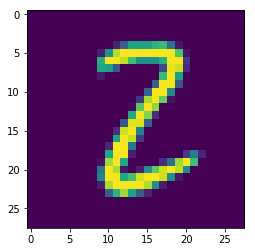

In [12]:
drawImg(X_test[0])

### Accuracy Testing

In [13]:
size = X_test.shape[0]
count = 0

for i in range(size):
    
    pred = knn(X_train, Y_train, X_test[i])
    expected= Y_test[i]
    
    if pred == expected:
        count +=1

percent = (float(count) / float(size))*100
print(percent)

100.0


Note that, I took only 42 testing data.